In [ ]:
from google.colab import files


uploaded = files.upload()


Saving Bengaluru_House_Data.csv to Bengaluru_House_Data.csv


# New Section

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = "/content/Bengaluru_House_Data.csv"

In [ ]:
df= pd.read_csv(path)

In [ ]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df.shape

(13320, 9)

In [ ]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [ ]:
df.describe().style.background_gradient(cmap='Reds',low=0.5,high=1.0,axis=1)

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


**Check** **for** **the** **Null** **Values**



In [ ]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

**Checking Duplicate values and drop the values**

In [ ]:
df.duplicated().sum()

529

In [ ]:
df[df.duplicated()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
971,Super built-up Area,Ready To Move,Haralur Road,3 BHK,NRowse,1464,3.0,2.0,56.0
1115,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1027,2.0,2.0,44.0
1143,Super built-up Area,Ready To Move,Vittasandra,2 BHK,Prlla C,1246,2.0,1.0,64.5
1290,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1194,2.0,2.0,47.0
1394,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1027,2.0,2.0,44.0
...,...,...,...,...,...,...,...,...,...
13285,Super built-up Area,Ready To Move,VHBCS Layout,2 BHK,OlarkLa,1353,2.0,2.0,110.0
13299,Super built-up Area,18-Dec,Whitefield,4 BHK,Prtates,2830 - 2882,5.0,0.0,154.5
13311,Plot Area,Ready To Move,Ramamurthy Nagar,7 Bedroom,NaN,1500,9.0,2.0,250.0
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345,2.0,1.0,57.0


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.nunique()

area_type          4
availability      81
location        1305
size              31
society         2688
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

**Checking** **Location** **Coloumn** **and** **fill** **null** **values**

In [ ]:
df.location.dtype

dtype('O')

In [ ]:
df.location.fillna(df.location.mode()[0],inplace=True)

**Size Column checking and Fill the null Values**

In [ ]:
df['size'].dtype

dtype('O')

In [ ]:
df['size'].mode()[0]

'2 BHK'

In [ ]:
df['size'].fillna(df['size'].mode()[0],inplace=True)

**Checking Society Column**

*   if any column has more than 30% values as null values we drop that coloumn



In [ ]:
df.society.isna().sum()*100/len(df)

41.654288171370496

In [ ]:
df.drop('society',axis=1,inplace=True)

In [ ]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [ ]:
df.isna().sum()

area_type         0
availability      0
location          0
size              0
total_sqft        0
bath             73
balcony         605
price             0
dtype: int64

**Checking Bath column and fill null values**

In [ ]:
df.bath.dtype

dtype('float64')

In [ ]:
df.bath.fillna(df.bath.mode()[0],inplace=True)

**Checking Balcony column and fill null values**

In [ ]:
df.balcony.dtype

dtype('float64')

In [ ]:
df.balcony.fillna(df.balcony.mode()[0],inplace=True)

In [ ]:
df.isna().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

**Outliers Detection**

*   To detect outliers we use boxplot



<Axes: ylabel='price'>

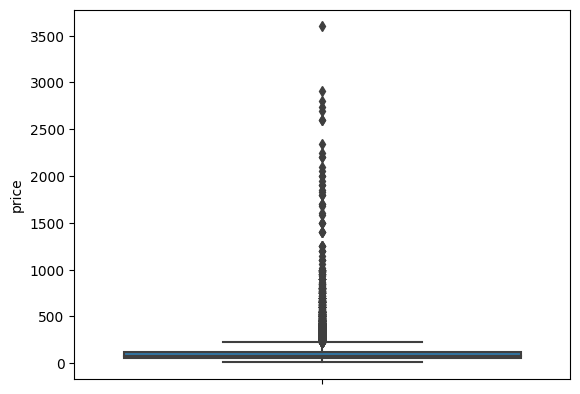

In [ ]:
sns.boxplot(y='price',data=df)

In [ ]:
df.price.describe()

count    12791.000000
mean       114.317646
std        151.480310
min          8.000000
25%         50.000000
50%         73.000000
75%        121.000000
max       3600.000000
Name: price, dtype: float64

**Total sqft**

In [ ]:
df.total_sqft.describe()

count     12791
unique     2117
top        1200
freq        808
Name: total_sqft, dtype: object

In [ ]:
df.total_sqft.dtype

dtype('O')

In [ ]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
ind=df[df.total_sqft.str.contains('-')].index

In [ ]:
ind

Int64Index([   30,    56,    81,   122,   137,   165,   188,   224,   549,
              579,
            ...
            12435, 12544, 12791, 12861, 12955, 12975, 12990, 13059, 13240,
            13265],
           dtype='int64', length=200)

In [ ]:
s=df[df.total_sqft.str.contains('-')]['total_sqft'].str.split('-')

In [ ]:
s

30       [2100 ,  2850]
56       [3010 ,  3410]
81       [2957 ,  3450]
122      [3067 ,  8156]
137      [1042 ,  1105]
              ...      
12975     [850 ,  1060]
12990    [1804 ,  2273]
13059    [1200 ,  1470]
13240    [1020 ,  1130]
13265    [1133 ,  1384]
Name: total_sqft, Length: 200, dtype: object

In [ ]:
lst=[]
for i in s:
  lst.append((float(i[0])+float(i[1]))/2)


In [ ]:
df.loc[ind,'total_sqft']=lst

In [ ]:
df.loc[ind]

,area_type,availability,location,size,total_sqft,bath,balcony,price
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,2475.0,4.0,0.0,186.000
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,3210.0,2.0,2.0,192.000
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,3203.5,2.0,2.0,224.500
122,Super built-up Area,18-Mar,Hebbal,4 BHK,5611.5,4.0,0.0,477.000
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,1073.5,2.0,0.0,54.005
...,...,...,...,...,...,...,...,...
12975,Super built-up Area,20-Aug,Whitefield,2 BHK,955.0,2.0,0.0,38.190
12990,Super built-up Area,18-May,Talaghattapura,3 BHK,2038.5,3.0,0.0,122.000
13059,Super built-up Area,Ready To Move,Harlur,2 BHK,1335.0,2.0,0.0,72.760
13240,Super built-up Area,Ready To Move,Devanahalli,1 BHK,1075.0,2.0,2.0,52.570


In [ ]:
df.total_sqft.replace('[A-Za-z. ]','',regex=True,inplace=True)

In [ ]:
df.total_sqft=df.total_sqft.astype(float)

In [ ]:
df.dtypes

area_type        object
availability     object
location         object
size             object
total_sqft      float64
bath            float64
balcony         float64
price           float64
dtype: object

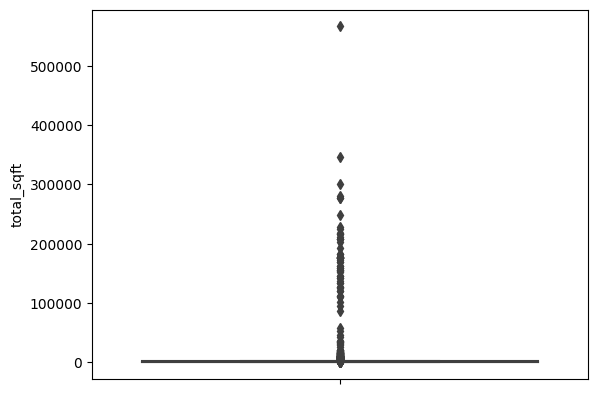

In [ ]:
sns.boxplot(y='total_sqft',data=df)

plt.show()

In [1]:
def outlier(data):
  q1=data.quantile(0.25)
  q3=data.quantile(0.75)

  iqr=q3-q1
  upper_bound=q3+1.5*iqr
  lower_bound=q1-1.5*iqr
  return data.clip(upper_bound,lower_bound)


print(upper_bound)
print(lower_bound)
print(q1,q3)

NameError: name 'upper_bound' is not defined

In [ ]:
outlier(df.total_sqft)

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13314    1715.0
13315    2600.0
13316    2600.0
13317    1141.0
13318    2600.0
Name: total_sqft, Length: 12791, dtype: float64

In [ ]:
df['Total']=outlier(df.total_sqft)

In [ ]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,Total
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,1200.0


In [ ]:
df[['total_sqft','Total']].describe()

,total_sqft,Total
count,12791.000000,12791.000000
mean,2432.812492,1444.891415
std,13186.508638,550.576060
min,1.000000,200.000000
25%,1100.000000,1100.000000
50%,1283.000000,1283.000000
75%,1700.000000,1700.000000
max,566584.000000,2600.000000


<Axes: ylabel='Total'>

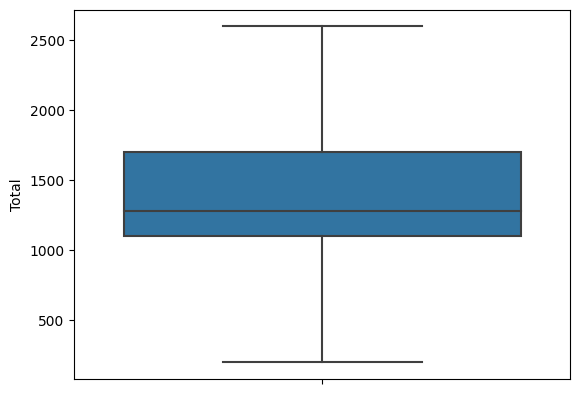

In [ ]:
sns.boxplot(y='Total',data=df)

In [ ]:
df['New_Price']=outlier(df.price)

In [ ]:
df[['price','New_Price']].describe()

,price,New_Price
count,12791.000000,12791.000000
mean,114.317646,94.570090
std,151.480310,60.646174
min,8.000000,8.000000
25%,50.000000,50.000000
50%,73.000000,73.000000
75%,121.000000,121.000000
max,3600.000000,227.500000


<Axes: ylabel='New_Price'>

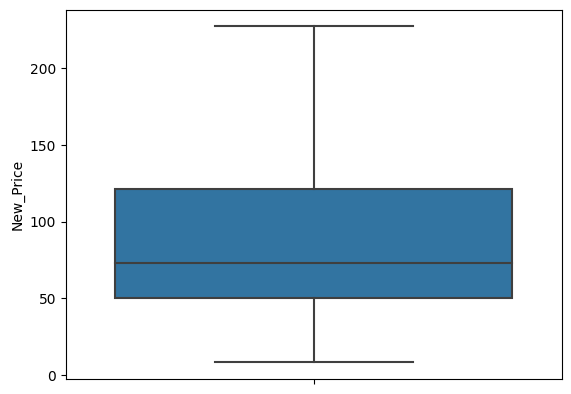

In [ ]:
sns.boxplot(y='New_Price',data=df)

# **Analysis**:
**Average price of builtup area, plot area and super built up area**

<ipython-input-74-ba5501f3cb3b>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax=sns.barplot(x='area_type',y='price',data=df,ci=False)


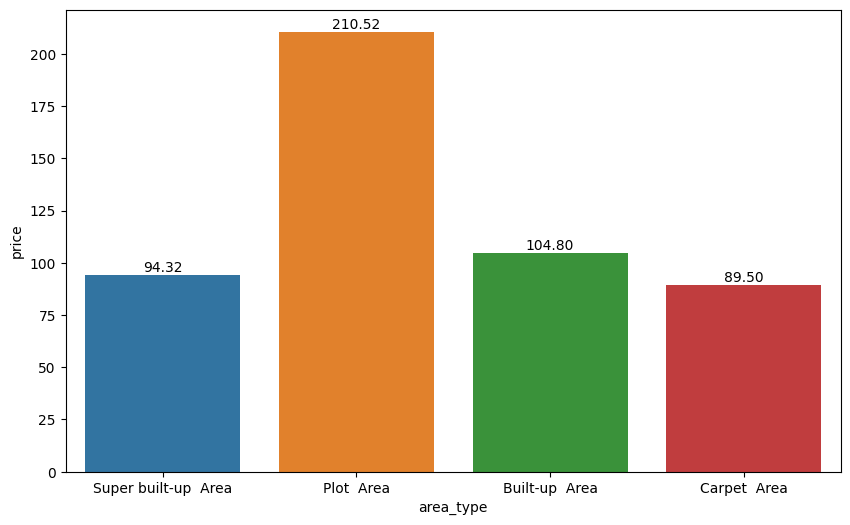

In [ ]:
plt.figure(figsize=(10,6),dpi=100)
ax=sns.barplot(x='area_type',y='price',data=df,ci=False)
for i in ax.containers:
  ax.bar_label(i,fmt='%.2f')

plt.show()

**Relationship between price and total sqft**

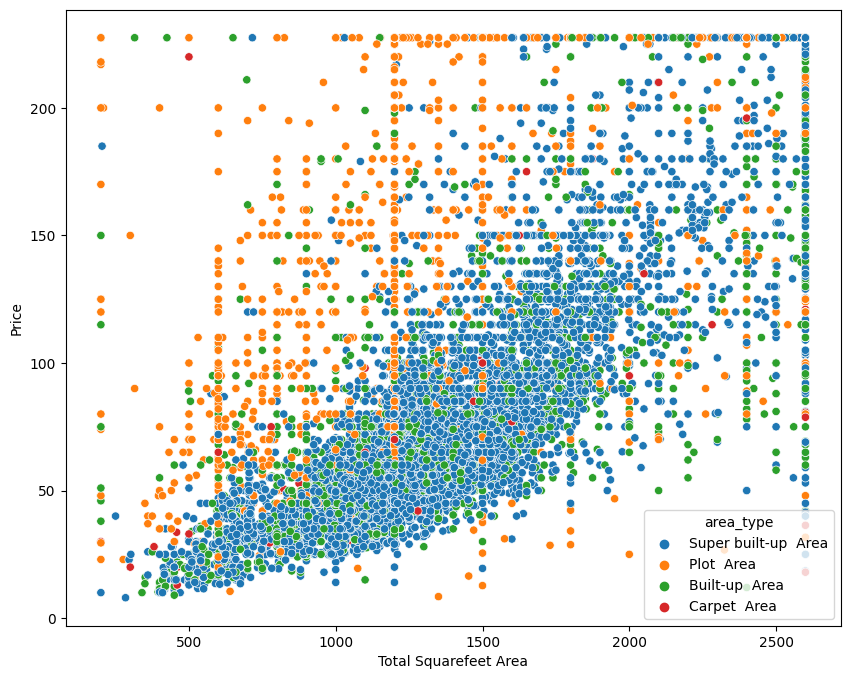

In [ ]:
plt.figure(figsize=(10,8),dpi=100)
sns.scatterplot(x='Total', y='New_Price',hue='area_type',data=df)
plt.xlabel('Total Squarefeet Area')
plt.ylabel('Price')

plt.show()

**Obseravation according to Area type**

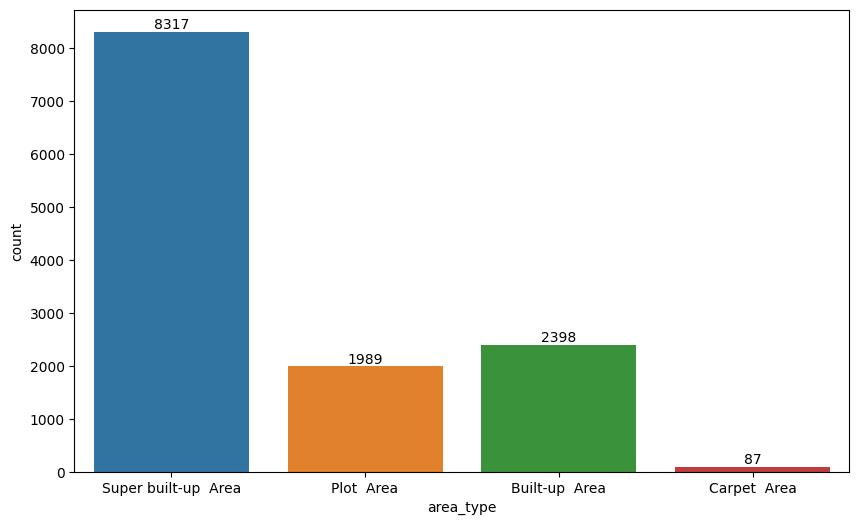

In [ ]:
plt.figure(figsize=(10,6),dpi=100)
ax=sns.countplot(x='area_type',data=df)

for i in ax.containers:
  ax.bar_label(i)

**Ratio of the areatype**

([<matplotlib.patches.Wedge at 0x7f0019801510>,
 [Text(-0.5000755669828773, 0.9797573308257276, 'Super built-up  Area'),
  Text(-0.041731188392907806, -1.0992081276606882, 'Built-up  Area'),
  Text(0.9483899881714093, -0.5572759014493938, 'Plot  Area'),
  Text(1.0997488867063943, -0.023502897439397086, 'Carpet  Area')],
 [Text(-0.27276849108156936, 0.5344130895413058, '65.02%'),
  Text(-0.02276246639613153, -0.5995680696331026, '18.75%'),
  Text(0.5173036299116778, -0.3039686735178511, '15.55%'),
  Text(0.5998630291125786, -0.012819762239671137, '0.68%')])

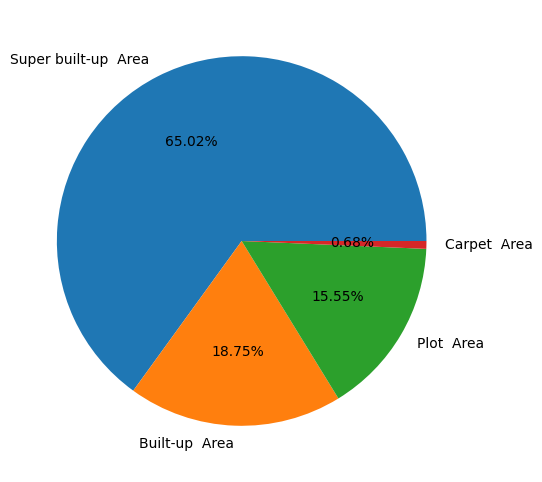

In [ ]:
plt.figure(figsize=(10,6),dpi=100)
plt.pie(df.area_type.value_counts(),labels=df.area_type.value_counts().index,autopct='%.2f%%')

In [ ]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,Total,New_Price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,1056.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,2600.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,1440.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,1521.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,1200.0,51.00


**Average Price of 2BHK, 3BHK, 4BHK**

In [ ]:
x=df[(df['size'] =='2 BHK') | (df['size'] =='3 BHK') | (df['size'] =='4 BHK')]


<ipython-input-98-029102d74d48>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax=sns.barplot(x='size',y='price',data=x,ci=False)


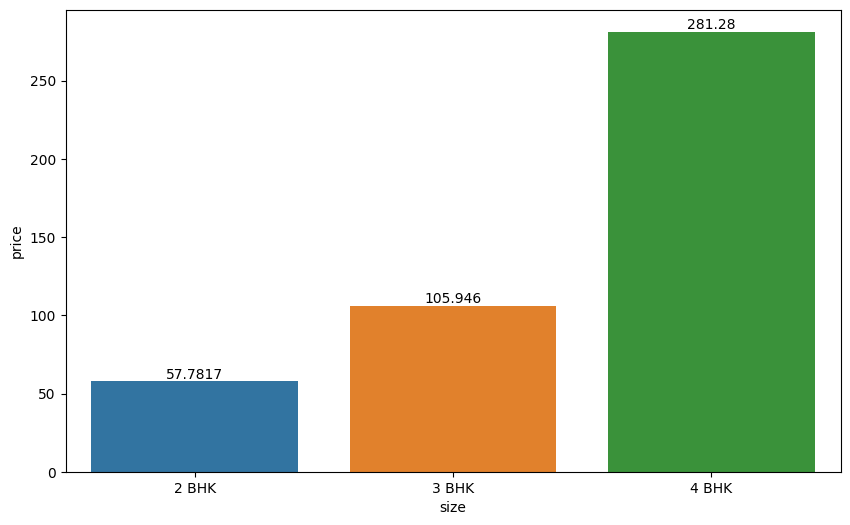

In [ ]:
plt.figure(figsize=(10,6),dpi=100)

ax=sns.barplot(x='size',y='price',data=x,ci=False)
for i in ax.containers:
  ax.bar_label(i)
  plt.show()

**Maximum price of 2BHK,3BHK,4BHK**

<ipython-input-99-a7038de06aa4>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax=sns.barplot(x='size',y='price',data=x,ci=False,estimator=np.max)


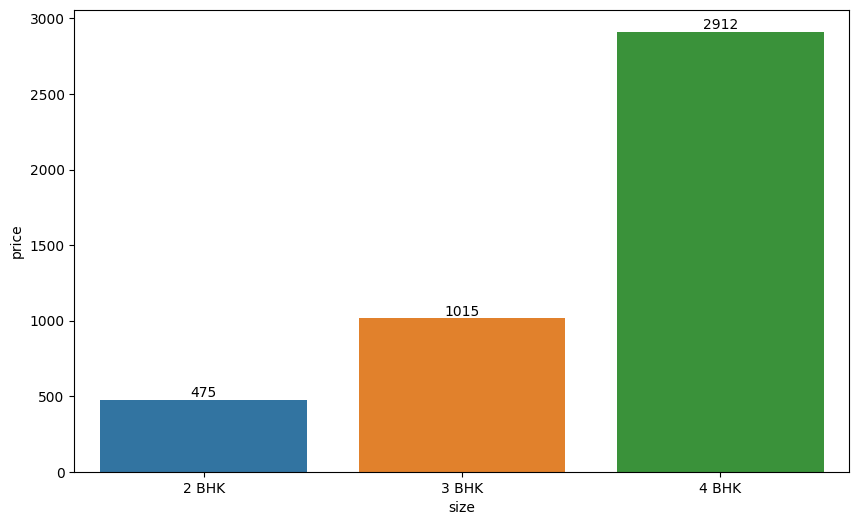

In [ ]:
plt.figure(figsize=(10,6),dpi=100)

ax=sns.barplot(x='size',y='price',data=x,ci=False,estimator=np.max)
for i in ax.containers:
  ax.bar_label(i)
  plt.show()

**Minimum price of 2BHK,3BHK,4BHK**

<ipython-input-100-885a1e75de3d>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax=sns.barplot(x='size',y='price',data=x,ci=False,estimator=np.min)


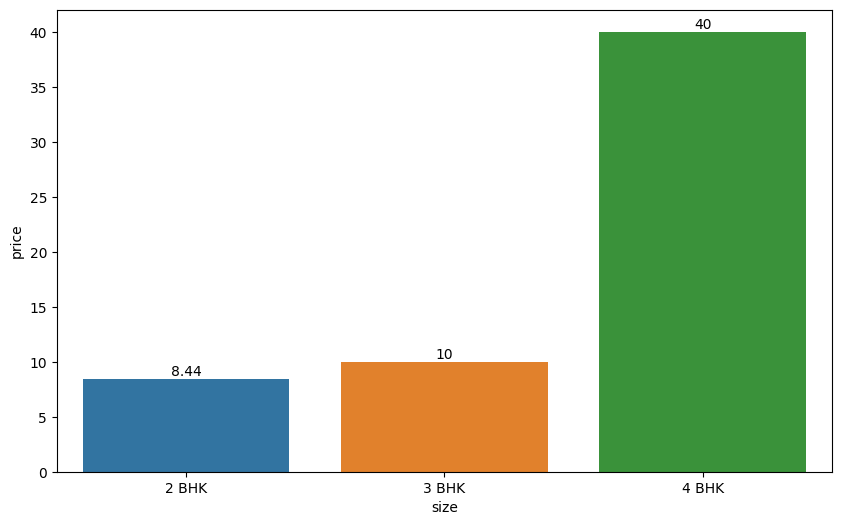

In [ ]:
plt.figure(figsize=(10,6),dpi=100)

ax=sns.barplot(x='size',y='price',data=x,ci=False,estimator=np.min)
for i in ax.containers:
  ax.bar_label(i)
  plt.show()

**Coorelation**

In [ ]:
df.corr()

<ipython-input-101-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,total_sqft,bath,balcony,price,Total,New_Price
total_sqft,1.000000,0.070755,0.024316,0.095530,0.199037,0.096261
bath,0.070755,1.000000,0.204692,0.451203,0.510815,0.611388
balcony,0.024316,0.204692,1.000000,0.123589,0.256743,0.183047
price,0.095530,0.451203,0.123589,1.000000,0.544778,0.686123
Total,0.199037,0.510815,0.256743,0.544778,1.000000,0.741887
New_Price,0.096261,0.611388,0.183047,0.686123,0.741887,1.000000


<ipython-input-103-2c2bc34618ee>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='Blues')


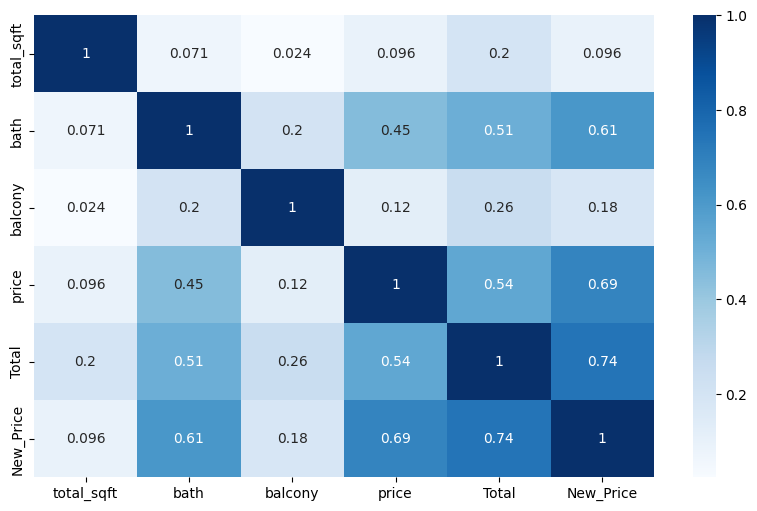

In [ ]:
plt.figure(figsize=(10,6),dpi=100)

sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()